<a href="https://colab.research.google.com/github/Nhat-Thanh/CS114.L21/blob/main/Recognizing_hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [1]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



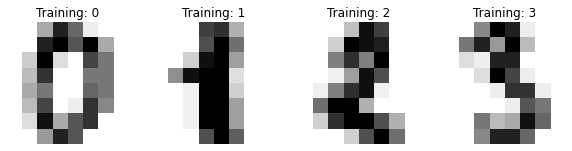

In [2]:
digits = datasets.load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
# print(X_test[40])

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



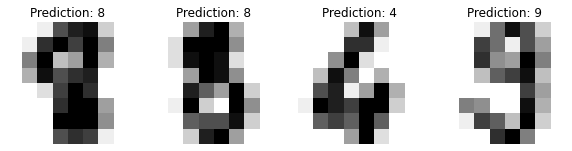

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [183]:
print("Classification report for classifier {0}:\n".format(clf),
      "{0}\n".format(metrics.classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted 

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


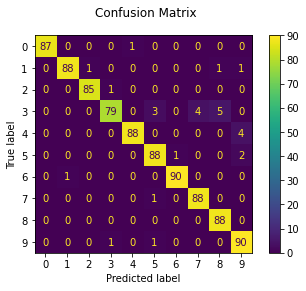

In [182]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n{}".format(disp.confusion_matrix))
plt.show()

##***Định nghĩa hàm chụp ảnh từ webcam***

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#***Chụp ảnh các mẫu ảnh để kiểm thử***
- Chụp ảnh các chữ sỗ 3, 6, 7, 9
- Mỗi chữ số, ta chụp 11 bức để kết luận có độ chính xác cao hơn 

<IPython.core.display.Javascript object>

Saved to so9_0.jpg


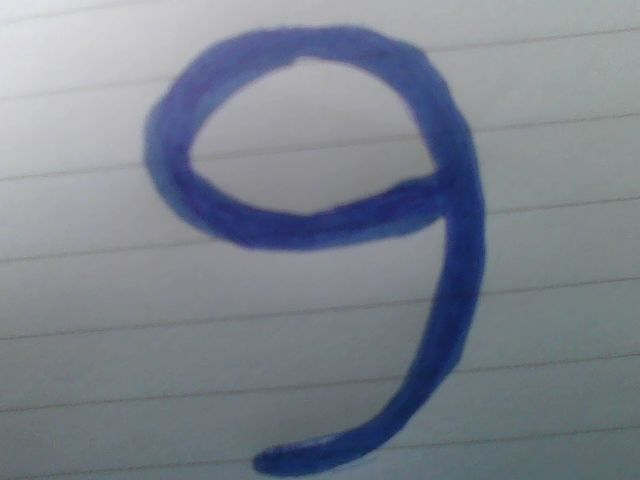

<IPython.core.display.Javascript object>

Saved to so9_1.jpg


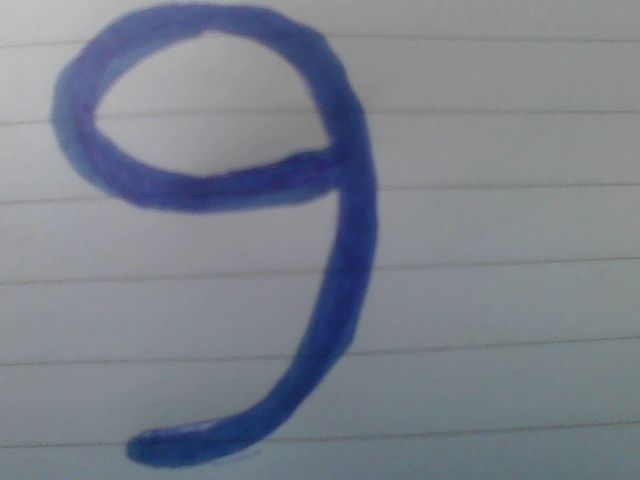

<IPython.core.display.Javascript object>

Saved to so9_2.jpg


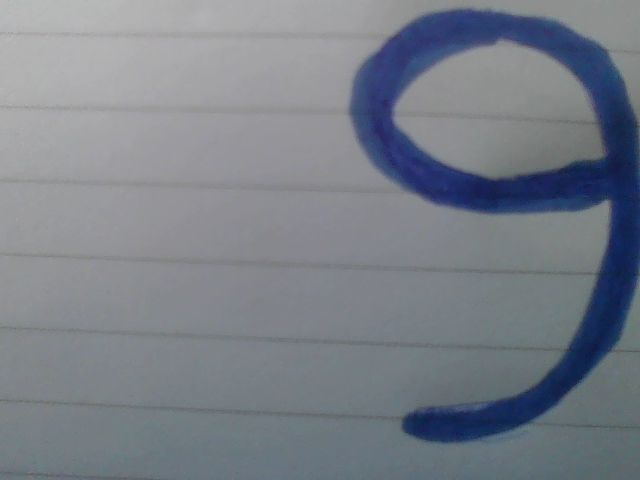

<IPython.core.display.Javascript object>

Saved to so9_3.jpg


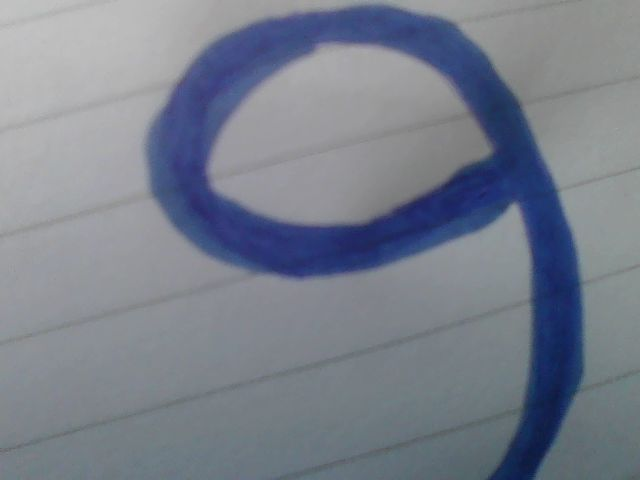

<IPython.core.display.Javascript object>

Saved to so9_4.jpg


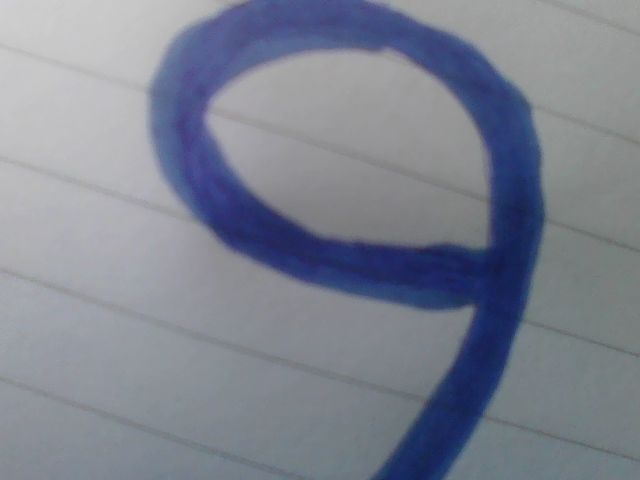

<IPython.core.display.Javascript object>

Saved to so9_5.jpg


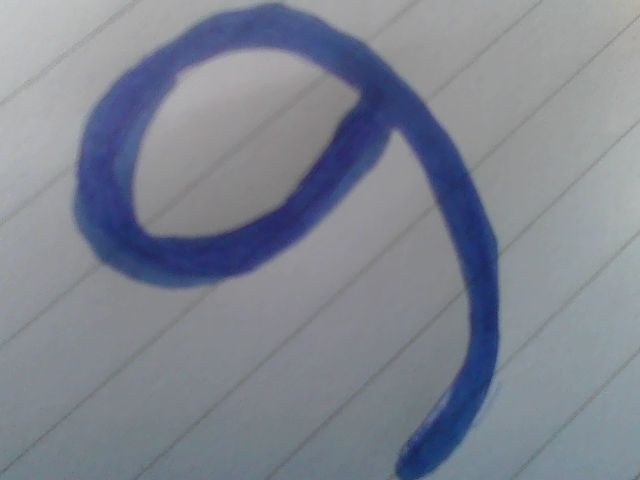

<IPython.core.display.Javascript object>

Saved to so9_6.jpg


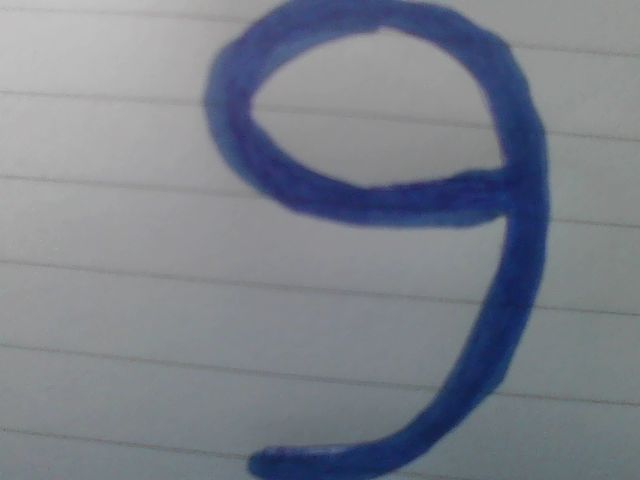

<IPython.core.display.Javascript object>

Saved to so9_7.jpg


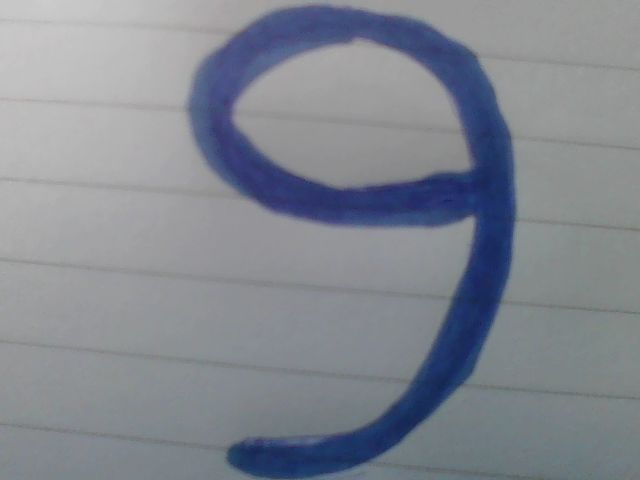

<IPython.core.display.Javascript object>

Saved to so9_8.jpg


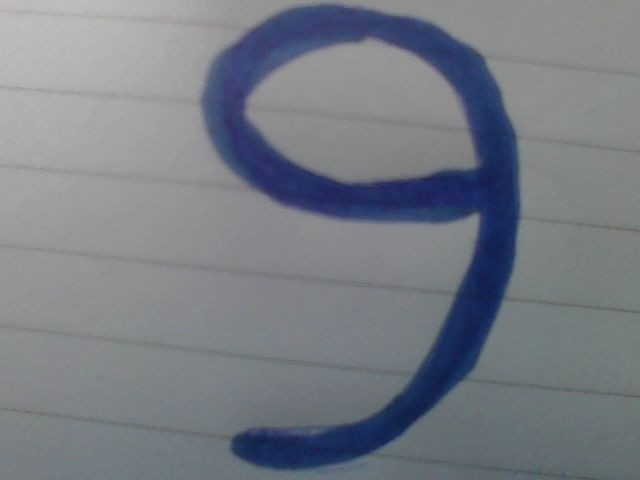

<IPython.core.display.Javascript object>

Saved to so9_9.jpg


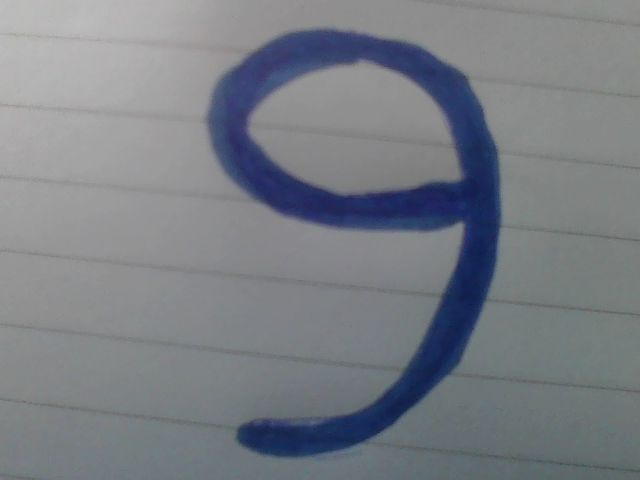

<IPython.core.display.Javascript object>

Saved to so9_10.jpg


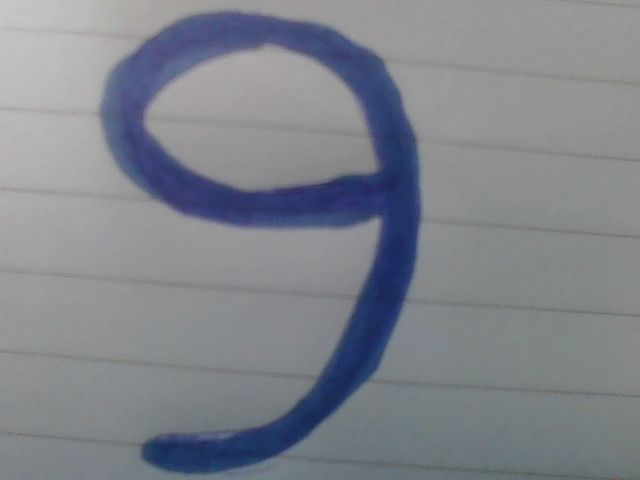

In [175]:
from IPython.display import Image
def create_testcase(number):
    i = 0
    while i < 11:
      try:
        number = "so9_{0}.jpg".format(i)
        filename = take_photo(filename=number)
        print('Saved to {}'.format(filename))
        # Show the image which was just taken.
        display(Image(filename))
      except Exception as err:
        # Errors will be thrown if the user does not have a webcam or if they do not
        # grant the page permission to access it.
        print(str(err))
      i += 1

create_testcase(3)
create_testcase(6)
create_testcase(7)
create_testcase(9)


# **Kiểm thử mô hình với các testcase vừa tạo**
Link testcase mẫu: https://uithcm-my.sharepoint.com/:u:/g/personal/19522246_ms_uit_edu_vn/ESPM8HXPZ_RBhztPR87sRkgBqFiz6YTwuH8GKIZU5Pu-3A?e=955Iq9


number: 3


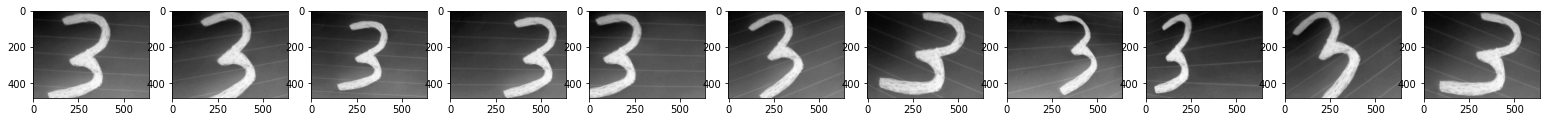

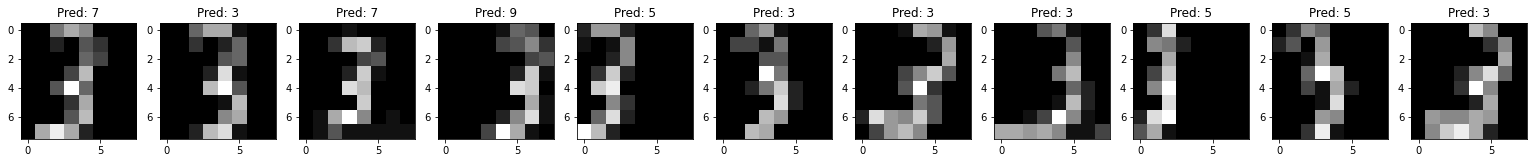

accuracy: [0.45454545]

number: 6


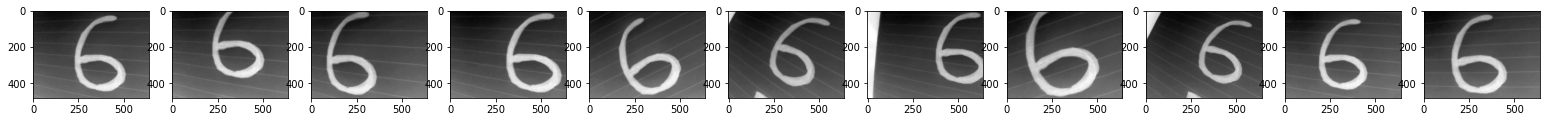

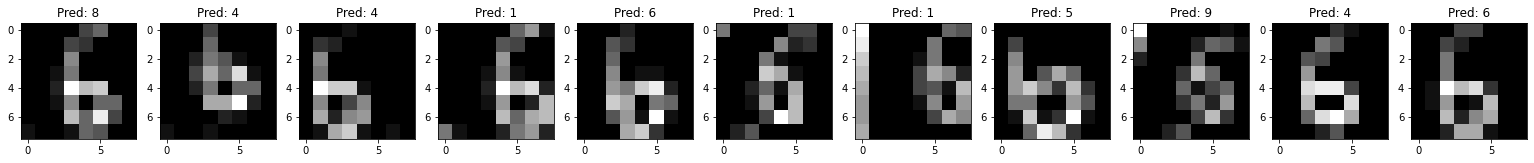

accuracy: [0.18181818]

number: 7


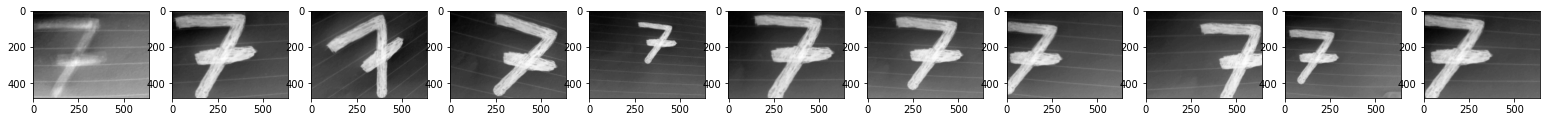

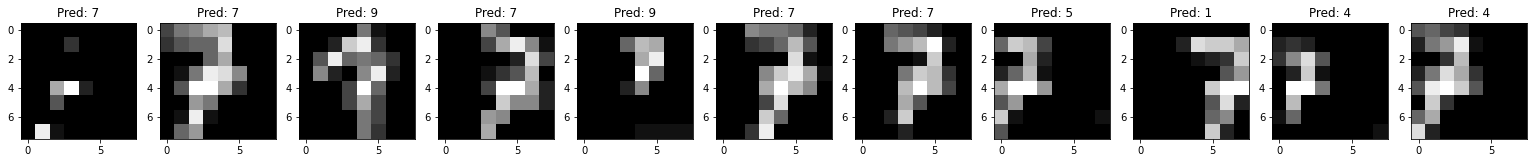

accuracy: [0.45454545]

number: 9


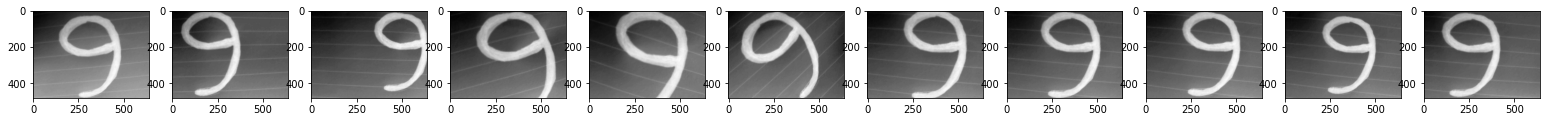

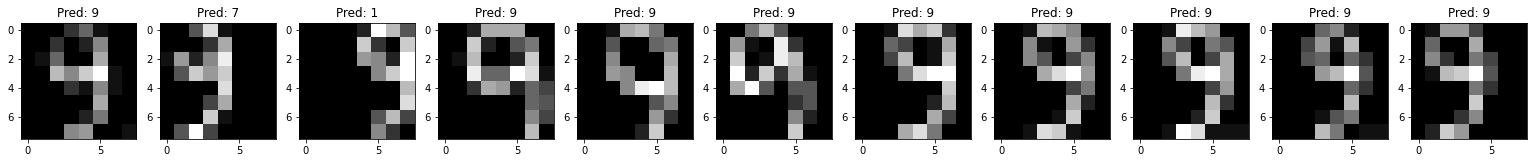

accuracy: [0.81818182]



In [181]:
from google.colab.patches import cv2_imshow

# define funcion
def predict_and_show(number):
    print("number:", number)
    input = []
    i = 0
    while i < 11:
      name = "so{0}_{1}.jpg".format(number, i)
      inputImage = cv2.imread(name, 0)
      inputImage = 255 - inputImage[:, :]
      input.append(inputImage)
      i += 1

    fig_input, axs = plt.subplots(1, 11, figsize=(27,27))
    i = 0
    while i < 11:
      axs[i].imshow(input[i], 'gray')
      i += 1
    plt.show()

    output = []
    i = 0
    while i < 11:
      ret, input[i] = cv2.threshold(input[i], 160, 255, cv2.THRESH_BINARY)
      input[i] = cv2.resize(input[i], (8, 8), interpolation = cv2.INTER_AREA)
      input[i] = cv2.normalize(input[i], None, 0, 15, cv2.NORM_MINMAX)
      output.append(clf.predict(input[i].reshape(1, 64)))
      i += 1

    fig_output, axs_output = plt.subplots(1, 11, figsize=(27,27))
    i = 0
    while i < 11:
      axs_output[i].title.set_text("Pred: {0}".format(int(output[i])))
      axs_output[i].imshow(input[i], 'gray')
      i += 1
    plt.show()

    i, probability = 0, 0
    while i < 11:
        probability += (output[i] == number)
        i += 1
    print("accuracy: {0}\n".format(probability / 11))
# end define funcion

predict_and_show(3)
predict_and_show(6)
predict_and_show(7)
predict_and_show(9)

##Kết luận
1) Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
- Mô hinh khi chạy thực tế với webcam của laptop và giấy viết tay cho lại kết quả không cao, thậm chí là khá tệ.

2) Ủa mà nhìn vào đâu để kết luận là tốt hay không?
- Từ kết quả chạy thực nghiệm với các test case khác nhau nhưng cùng một chữ số
	+ Số 3: 5/11 -> accuracy: 0.45
	+ Số 6: 2/11 -> accuracy: 0.18
	+ Số 7: 5/11 -> accuracy: 0.45
	+ Số 9: 9/11 -> accuracy: 0.81

- nếu xét trên toàn bộ 44 bức ảnh của toàn bộ các testcase thì mô hình chỉ đoán đúng được 21/44 (0.48%), kkết quả này khá thấp so với kì vọng do số bức ảnh dự đoán đúng chưa được một nửa trên tổng số bức ảnh.

3) Nếu không tốt thì lý do tại sao?

4) Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?